In [ ]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM
import jinja2

import numpy as np

import panel as pn; import holoviews as hv
pn.extension();     hv.extension('bokeh', logo=False)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Systems of Linear Equations (Part b)</strong><br>
    <strong style="height:100px;color:darkred;font-size:30px;">The Gaussian Elimination Algorithm</strong>
</div>

# 1. Corner Cases for Gaussian Elimination

## 1.1 The Approach to Solving $A x = b$

&#x1F59B; Transform a given a **system** of linear equations to an **equivalent row echelon form system** of equations,<br>
$\qquad$ i.e., a new, simpler system having the exact same solutions as the original system<br>
$\qquad$ **one equation at a time**.

$\qquad$ At each step, we **dedicate an equation to solve for the leading variable**<br>
$\qquad$ After the elimination step, the **remaining equations no longer have that variable!**<br>
$\qquad\qquad\qquad\qquad$ One less equation, but also one less variable

There are some **corner cases** to take care of:<br>
$\qquad$ So far, we have assumed **we always have a pivot**<br>
$\qquad$ <strong style="color:darkred;font-size:20px;">That is not necessarily true!</strong>

## 1.2  Missing Pivots

### 1.2.1 Subcase: There is an Equation with Current Leading Variable

<!-- %%itikz --debug --keep-dir . --file-prefix ge_ --temp-dir --template standalone --tex-packages=[dvipsnames]xcolor,nicematrix,tikz,relsize,amsmath,systeme --tikz-libraries=decorations.pathreplacing
    % --nexec=4  --use-dvi --use-xetex
    % np.array([[0,2,1,1], [0,2,0,1], [3,1,2,3]]) @ np.array([2,1,-1,3])

    $\qquad\qquad (\xi_1) \quad \Leftrightarrow \quad 
    \sysalign{r,r}\systeme{
      x_1 + 2 x_2 + x_3 - x_4    -   x_5  =  0   @{(R_1)},   
                  2 x_3  +  x_4  +   x_5  =  4   @{(R_2)},
                  2 x_3 + 2 x_4  +   x_5  =  5   @{(R_3)},
           3 x_2 +  x_3 + 2 x_4  + 3 x_5  = 14   @{(R_4)}
    }
    % -------------------------------------
    \qquad \Leftrightarrow \qquad
    % -------------------------------------
    \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
        1 &  2   &  1  &-1 &-1 & \;  0 \\
        0 &  \boxed{0}   &  2  & 1 & 1 & \;  4 \\
        0 &  {0}  &  2  & 2 & 1 & \;  5 \\
        0 &  3  &  1  & 2 & 3 & \; 14
    \end{pNiceArray}
    $
%  can use camtesia to color the boxes! \text{\colorbox{CornflowerBlue}{3}} -->
<img style="margin-left:2cm;" src="Figs/ge_missing_pivot_0.svg">

----
<div style="float:center;width:100%;text-align:left;font-size:20px;"> Solution: <strong style="color:darkred;font-size:20px;"> Interchange rows</strong>
$\quad R_2 \longleftrightarrow R_4$</div>

<!-- 
pivots =[]; n_layers=0
A  = np.array([[1.,2,1,-1,-1,0],[0,0,2,1,1,4], [0, 0, 2, 2, 1, 5], [0,3,1,2,3,14]]); pivots.append((1,1)); n_layers=1
E1 = np.array([[1,0,0,0],[0,0,0,1],[0, 0, 1, 0],[0, 1, 0,0]]); A1 = E1 @ A;          pivots.append((2,2)); n_layers=2

mat_rep, submatrix_locs, pivot_locs, txt_with_locs, mat_format = nM.ge_int_layout( [[None, A], [E1, A1]], Nrhs=1, pivots=pivots)
pivot_locs += [('(4-6)','red')]

%%itikz --keep-dir .  --file-prefix ge_pivot_underneath_ --as-jinja --temp-dir --use-xetex --crop --nexec 4
  %
    \documentclass[notitlepage]{article}
        %\pagenumbering{gobble}
        \pagestyle{empty}

        %\documentclass{standalone}
        %\usepackage{standalone}

        %\usepackage[french]{babel}
        \usepackage{xltxtra}
        %\usepackage{xcolor}
        %\usepackage[dvipsnames]{xcolor}

        \usepackage{nicematrix,tikz}
        \usetikzlibrary{calc,fit}

        {{nM.extension}}

    \begin{document}
        {{nM.preamble}}

        $\qquad \begin{NiceArray}[create-medium-nodes]{{mat_format}}
        {{mat_rep}}
        \CodeAfter
        % ----------------------------------------- submatrix delimiters
          \SubMatrixOptions{right-xshift=2mm, left-xshift=2mm}
            {% for loc in submatrix_locs: -%}
                  \SubMatrix({{loc}})
            {% endfor -%}
        % ----------------------------------------- pivot outlines
        \begin{tikzpicture}
            \begin{scope}[every node/.style = draw]
            {% for loc in pivot_locs: -%}
                \node [draw,{{loc[1]}},fit = {{loc[0]}}]  {} ;
            {% endfor -%}
            \end{scope}

        % ----------------------------------------- explanatory text
            %\node [right,align=left] at (2-8.east)  {\quad Augment $A$ with both $b_1$ and $b_2$.\\
            %                                         \quad Choose pivot 2.} ;
            %\node [right] at (5-8.east)             {\quad Choose the second pivot 1} ;
            %\node [right] at (8-8.east)             {\quad Choose the third pivot 3.} ;
            %\node [right] at (11-8.east)            {\quad Finally, scale each pivot to 1.} ;
            %\node [right,align=left] at (14-8.east) {\quad There are no free variables.\\
            %                                        \quad We have obtained a unique solution.} ;

        % ----------------------------------------- row echelon form path

        \end{tikzpicture}
        \end{NiceArray}$
    \end{document}
-->
<img style="margin-left:5cm;" src="Figs/ge_pivot_underneath.svg">

### 1.2.2 Subcase: There is No Equation with Current Leading Variable

<!-- %%itikz --keep-dir . --file-prefix ge_no_pivot_ --temp-dir --template standalone --tex-packages=nicematrix,tikz,relsize,amsmath,systeme --tikz-libraries=decorations.pathreplacing
    $\qquad\qquad (\xi)\qquad \Leftrightarrow \qquad
    \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
      1 &2   &  1  &-1 &-1 & \;  0 \\
    0 &  {\boxed{0}}   &  2  & 1 & 1 & \;  4 \\
    0 &  {0}  &  2  & 2 & 1 & \;  5 \\
    0 &  {0}  &  1  & 2 & 3 & \; 14 \\
    \end{pNiceArray}
    % -------------------------------------
    \qquad \Leftrightarrow \qquad
    % -------------------------------------
    \sysalign{r,r}\systeme{
      x_1 + 2 x_2 + x_3 - x_4    -   x_5  =  0   @{(R_1)},   
                  2 x_3  +  x_4  +   x_5  =  4   @{(R_2)},
                  2 x_3 + 2 x_4  +   x_5  =  5   @{(R_3)},
                    x_3 + 2 x_4  + 3 x_5  = 14   @{(R_4)}
    }
    $
-->
<img style="margin-left:1cm;" src="Figs/ge_no_pivot_0.svg">

-----------------------------------
<div style="float:center;width:100%;text-align:left;font-size:20px;">
Solution: <strong style="color:darkred;font-size:20px;"> Ignore the variable: it is free!</strong><br>
</div>

$\qquad$ <text style="font-size:15px;">**Move on to the next column** (i.e., the next variable)</text>

Interchanging rows when there is a missing pivot<br>
$\qquad$ will <strong>move any <strong style="color:darkred;">rows of zeros</strong> below any row with non-zero entries</strong>

There is **a special consideration,** however

### 1.2.3 Special Case: Rows of Zeros

#### **Example 1: Zero Right Hand Side**

<!--
%%itikz --temp-dir --template standalone --tex-packages=nicematrix,tikz,relsize,amsmath,systeme --tikz-libraries=decorations.pathreplacing
    $\qquad\qquad (\xi)\qquad \Leftrightarrow \qquad
    \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
      {\boxed{1}} &2   &  1  &-1 &-1 & \;  0 \\
        %\hline
        {{0}} &  {{0}}   & {{0}}  & {{0}} & {{0}} & \; {{0}} \\
        %\hline
        0 & {0}  &  2  & 2 & 1 & \;  5 \\
        0 & {0}  &  1  & 2 & 3 & \; 14 \\
    \end{pNiceArray}
    % -------------------------------------
    \qquad \Leftrightarrow \qquad
    % -------------------------------------
    \sysalign{r,r}\systeme{
      x_1 + 2 x_2 + x_3 - x_4    -   x_5  =  0   @{(R_1)},   
                  0                       =  0   @{(R_2)},
                  2 x_3 + 2 x_4  +   x_5  =  5   @{(R_3)},
                    x_3 + 2 x_4  + 3 x_5  = 14   @{(R_4)}
    }
    $
--><img style="margin-left:2cm;" src="Figs/ge_zero_row_0.svg">

----
<div style="float:center;width:100%;text-align:left;font-size:20px;">
<strong style="color:darkred;font-size:20px;">The equation reads 0=0, and can therefore be ignored!</strong>
</div>

$\qquad$  **Move the row to the bottom** of the matrix (unless we are already doing a row exchange (Case 1.1.1)

#### **Example 2: Nonzero Right Hand Side**

<!--
%%itikz --temp-dir --template standalone --tex-packages=[dvipsnames]xcolor,nicematrix,tikz,relsize,amsmath,systeme --tikz-libraries=decorations.pathreplacing
    $\qquad\qquad (\xi)\qquad \Leftrightarrow \qquad
    \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
     1 &2   &  1  &-1 &-1 & \;  0 \\
        %\hline
       0 &  0  & 0  & 0 &0 & \; \color{Maroon}{\mathbf{2}} \\
        %\hline
        0 & 0  &  2  & 2 & 1 & \;  5 \\
        0 & 0  &  1  & 2 & 3 & \; 14 \\
    \end{pNiceArray}
    % -------------------------------------
    \qquad \Leftrightarrow \qquad
    % -------------------------------------
    \sysalign{r,r}\systeme{
      x_1 + 2 x_2 + x_3 - x_4    -   x_5  =  0   @{(R_1)},   
                  0                       =  \color{Maroon}{\mathbf{2}}  @{(R_2)},
                  2 x_3 + 2 x_4  +   x_5  =  5   @{(R_3)},
                    x_3 + 2 x_4  + 3 x_5  = 14   @{(R_4)}
    }
    $
--><img style="margin-left:1cm;" src="Figs/ge_zero_row_1.svg">

----
<div style="float:center;width:100%;text-align:left;font-size:20px;"><strong style="color:darkred;font-size:20px;">The equations are contradictory: NO SOLUTIONS</strong>
</div>

**Remark:**<br>
$\qquad$ If we continue to the end, we will see a **pivot on the right hand side**

# 2. Example Computations

## 2.1 The GE Algorithm

### 2.1.1 Algorithm Pseudocode

```python
cur_row = cur_col = 1                                         # Start in row 1, column 1
while cur_row ≤ M and cur__col ≤ N                            # Process one column at a time (matrix size M x N)
    pivot_row = find_pivot in cur_col at or below cur_row     # Find a pivot for the current row and column
    if there is a pivot in cur_col                            # 
       interchange cur_row and pivot_row                      # Exchange rows to put the pivot in the current row
       eliminate entries in cur_col below cur_row             # Eliminate all entries below the pivot
       cur_col += 1                                           # Go to the next row and next column
       cur_row += 1
    else                                                      # No pivot? Go to the next column
       cur_col += 1
```

<!-- %%itikz --keep-dir . --file-prefix ge_ --temp-dir --template standalone --tex-packages=nicematrix
    $    \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
        1 &  2  &  1  &-1 &-1 & \;  0 \\
        0 &  0  &  2  & 1 & 1 & \;  4 \\
        0 &  0  &  2  & 2 & 1 & \;  5 \\
        0 &  3  &  1  & 2 & 3 & \; 14
    \end{pNiceArray}
    \quad \longrightarrow \quad
    \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
        1 &  2  &  1  &-1 &-1 & \;  0 \\
        0 &  3  &  1  & 2 & 3 & \; 14 \\
        0 &  0  &  2  & 1 & 1 & \;  4 \\
        0 &  0  &  2  & 2 & 1 & \;  5
    \end{pNiceArray}
    $
    $\qquad$ versus $\qquad$
    $ \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
        1 &  2  &  1  &-1 &-1 & \;  0 \\
        0 &  0  &  2  & 1 & 1 & \;  4 \\
        0 &  0  &  2  & 2 & 1 & \;  5 \\
        0 &  0  &  1  & 2 & 3 & \; 14
    \end{pNiceArray}
    \quad \longrightarrow \quad
    \begin{pNiceArray}{*5r|r}[left-margin = 4pt]
        1 &  2  &  1  &-1 &-1 & \;  0 \\
        0 &  0  &  2  & 1 & 1 & \;  4 \\
        0 &  0  &  2  & 2 & 1 & \;  5 \\
        0 &  0  &  1  & 2 & 3 & \; 14
    \end{pNiceArray}
    $
-->
<div style="float:center;width:100%;text-align:left;">
    <strong style="height:100px;color:darkred;font-size:15px;">Current Position (2,2). Where will we move next?</strong><br><br>
</div>
<img style="margin-left:1cm;" src="Figs/ge_where_to_move_to.svg">

#### **Remarks:**

* There are two cases: after treating a given column:
    * If there is a pivot in the current column,  we **move to the next column, and next row**
    * If there is no pivot in the current column, we **move to the next column, but stay in the current row**

* When we find a pivot, we have to zero out **every entry below the pivot** before moving on to find another pivot

## 2.2 Example: Redundant Equations

In [182]:
# GENERATE A PROBLEM
# -------------------------------------------------------------------------
R  = np.array( [[ 1,  1,  1,  2,  2],       # R: row echelon form
                [ 0,  1, -1,  1,  0],
                [ 0,  0,  0,  0,  0],       # misplaced row of zeros (force row exchange)
                [ 0,  0,  0,  1, -2]])

xp = np.array( [[ 1, -1,  0,  2,  0]]).T    # particular solution: set the free variables to 0!
# -------------------------------------------------------------------------
E  = np.array([[ 1,  0,  0,  0],            # product of the elementary step matrices
               [-1,  1,  0,  0],
               [ 1,  1,  1,  0],
               [ 1,  3, -1,  1],
              ])
# ------------------------------------------------------------------------
A  = E@R;                                   # generate A, b and (A | b)
b  = A @ xp; Ab = np.hstack( [A, b]);
#print("(A | b) ="); Ab; print("x_p ="); xp.T 
# -------------------------------------------------------------------------
# SOLVE THE PROBLEM
# -------------------------------------------------------------------------
matrices = [[None, Ab]]; pivots = []; txt=[];  

E1 = np.array( [[1,0,0,0],[1,1,0,0],[-1,0,1,0],[-1,0,0,1]]); A1 = E1@Ab; matrices.append([E1,A1]); pivots.append((1,1));txt.append("Pivot at(1,1)")
#print("A1 = "); A1
E2 = np.array( [[1,0,0,0],[0,1,0,0],[ 0,-1,1,0],[0,-3,0,1]]);A2 = E2@A1; matrices.append([E2,A2]); pivots.append((2,2));txt.append("Pivot at(2,2)")
#print("A2 = "); A2
E3 = np.array( [[1,0,0,0],[0,1,0,0],[ 0,0,0,1],[0,0,1,0]]);A3 = E3@A2; matrices.append([E3,A3]); pivots.append((2,2));txt.append("Interchange rows 3,4")
#print("A3 = "); A3

pivots.append((3,4)); txt.append("In row echelon form")
mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_int_layout( matrices, Nrhs=1, pivots=pivots, txt=txt)

<!--
%%itikz --as-jinja --temp-dir --file-prefix bob_ --use-xetex --crop --nexec 4

    \documentclass[notitlepage]{article}
        %\pagenumbering{gobble}
        \pagestyle{empty}

        %\documentclass{standalone}
        %\usepackage{standalone}

        %\usepackage[french]{babel}
        \usepackage{xltxtra}
        %\usepackage{xcolor}
        %\usepackage[dvipsnames]{xcolor}

        \usepackage{nicematrix,tikz}
        \usetikzlibrary{calc,fit}

        {{nM.extension}}

    \begin{document}
        {{nM.preamble}}

        Try the following example:
        \bigskip

        $\begin{NiceArray}[create-medium-nodes,last-row]{{mat_format}}
        {{mat_rep}}
        \CodeAfter
        % ----------------------------------------- submatrix delimiters
          \SubMatrixOptions{right-xshift=2mm, left-xshift=2mm}
            {% for loc in submatrix_locs: -%}
                  \SubMatrix({{loc}})
            {% endfor -%}
        % ----------------------------------------- pivot outlines
        \begin{tikzpicture}
            \begin{scope}[every node/.style = draw]
            {% for loc in pivot_locs: -%}
                \node [draw,{{loc[1]}},fit = {{loc[0]}}]  {} ;
            {% endfor -%}
            \end{scope}

        % ----------------------------------------- explanatory text
            {% for t in txt_with_locs: -%}
                \node [right,align=left] at {{t[0]}}  {\quad {{t[1]}}} ;
            {% endfor -%}

            %\node [right,align=left] at (2-8.east)  {\quad Augment $A$ with both $b_1$ and $b_2$.\\
            %                                         \quad Choose pivot 2.} ;
            %\node [right] at (5-8.east)             {\quad Choose the second pivot 1} ;
            %\node [right,align=left] at (14-8.east) {\quad There are no free variables.\\
            %                                        \quad We have obtained a unique solution.} ;

        % ----------------------------------------- row echelon form path

        \end{tikzpicture}
        \end{NiceArray}$
        \vspace{0.3cm}

        End of Gaussian Elimination: next, decorate the $R$ matrix
    \end{document}
--><!--
%%itikz --temp-dir  --file-prefix foo_  --template article --tex-packages=amssymb,cascade,systeme,nicematrix,tikz,relsize --crop --tikz-libraries=decorations.pathreplacing

% ===================================================================================== Decorate matrix
\NiceMatrixOptions{code-for-last-row = \color{blue}, code-for-first-row = \color{red}}
$\begin{pNiceArray}{*5r|r}[left-margin = 4pt, first-col, last-row,
    code-before =
    {
    \tikz \draw[red] (row-1-|col-1) -- (row-2-|col-1)
                  -- (row-2-|col-2) -- (row-3-|col-2)
                  -- (row-3-|col-4) -- (row-4-|col-4)
                  -- (row-4-|col-7);
    }
]
& \color{red}{\mathbf{1}}   & 1                       &  1 &  2                       &  2 & \;  4 \\
& 0                         & \color{red}{\mathbf{1}} & -1 &  1                       &  0 & \;  1 \\
& 0                         & 0                       &  0 &  \color{red}{\mathbf{1}} & -2 & \;  2 \\
& 0                         & 0                       &  0 &  0                       &  0 & \;  0 \\
%
\color{blue}{\begin{matrix} \\ \text{basic}\\ \text{free} \end{matrix}}
    & \begin{matrix} x_1        \\             \end{matrix}
    & \begin{matrix} x_2        \\             \end{matrix}
    & \begin{matrix}            \\  x_3=\alpha \end{matrix}
    & \begin{matrix} x_4        \\             \end{matrix}
    & \begin{matrix}            \\  x_5=\beta  \end{matrix}
    &
\end{pNiceArray}$
% =========================================================================== Solve
%\vspace{1cm}       % below the figure; inkscape cropping fails otherwise...
%
% --------------------------------------------------------------- Solve
%    {\ShortCascade%
%       {\ShortCascade%
%          {\ShortCascade%
%             {$\boxed{x_3 = \alpha, x_5=\beta}$}%
%             {$x_4 = 2 + 2 x_5$}%
%             {$\;\Rightarrow\; \boxed{x_4 =  2 + 2 \beta}$}%
%          }%
%          {$x_2 = 1 +x_3-x_4$}%
%          {$\;\Rightarrow\; \boxed{x_2 = -1+\alpha-2\beta}$}%
%       }%
%       {$x_1 = 4 - x_2 - x_3 - 2 x_4 -2 x_5$}%
%       {$\;\Rightarrow \; \boxed{x_1 =  1-\alpha+2\beta}.$}
%    }%
%%& % -------------------------------------------------------------------------- Standard Form
%\vspace{1cm}
%
%    {$\; \therefore\;\begin{pmatrix}x_1\\x_2\\x_3\\x_4\\x_5\end{pmatrix}
%                    =        \begin{pmatrix} 1 \\ -1 \\ 0 \\ 2 \\ 0 \end{pmatrix}
%                    + \alpha \begin{pmatrix}-1 \\  1 \\ 1 \\ 0 \\ 0 \end{pmatrix}
%                    + \beta  \begin{pmatrix} 2 \\ -2 \\ 0 \\ 2 \\ 1 \end{pmatrix}
%         $
%    }
-->
<!-- had to run the example 3 times and use divs?! -->
<div style="float:left;"><img src="Figs/ge_example_1a.svg"></div>
<div style="float:right;">
    <div style="border:1px solid black;margin-left:1cm;padding:10px 10px 5px 5px;">
    <img style="margin-left:2cm;" src="Figs/ge_example_1b.svg"><br><br>
    <img style="margin-left:2cm;" src="Figs/ge_example_1c.svg"><br><br>
    <img style="margin-left:2cm;" src="Figs/ge_example_1d.svg">
    </div>
</div>

## 2.3 Example: Contradiction

In [199]:
# GENERATE A PROBLEM
# -------------------------------------------------------------------------
R  = np.array( [[ 1,  1,  1,  2,  2],       # R: row echelon form
                [ 0,  1, -1,  1,  0],
                [ 0,  0,  0,  0,  0],       # misplaced row of zeros (force row exchange)
                [ 0,  0,  0,  1, -2]])

xp = np.array( [[ 1, -1,  0,  2,  0]]).T    # particular solution: set the free variables to 0!
# -------------------------------------------------------------------------
E  = np.array([[ 1,  0,  0,  0],            # product of the elementary step matrices
               [-1,  1,  0,  0],
               [ 1,  1,  1,  0],
               [ 1,  3, -1,  1],
              ])
# ------------------------------------------------------------------------
A  = E@R;                                   # generate A, b and (A | b)
b  = A @ xp; b[2,0]=8; Ab = np.hstack( [A, b]);
#print("(A | b) ="); Ab; print("x_p ="); xp.T 
# -------------------------------------------------------------------------
# SOLVE THE PROBLEM
# -------------------------------------------------------------------------
matrices = [[None, Ab]]; pivots = []; txt=[];  

E1 = np.array( [[1,0,0,0],[1,1,0,0],[-1,0,1,0],[-1,0,0,1]]); A1 = E1@Ab; matrices.append([E1,A1]); pivots.append((1,1));txt.append("Pivot at(1,1)")
#print("A1 = "); A1
E2 = np.array( [[1,0,0,0],[0,1,0,0],[ 0,-1,1,0],[0,-3,0,1]]);A2 = E2@A1; matrices.append([E2,A2]); pivots.append((2,2));txt.append("Pivot at(2,2)")
#print("A2 = "); A2
E3 = np.array( [[1,0,0,0],[0,1,0,0],[ 0,0,0,1],[0,0,1,0]]);A3 = E3@A2; matrices.append([E3,A3]); pivots.append((2,2));txt.append("R3 reads 0 = 3; CONTRADICTION ")
#print("A3 = "); A3

pivots.append((3,4)); txt.append("Pivot in the b column: CONTRADICTION")
mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_int_layout( matrices, Nrhs=1, pivots=pivots, txt=txt)

<!--
%%itikz --as-jinja --temp-dir --file-prefix bob_ --use-xetex --crop --nexec 4

    \documentclass[notitlepage]{article}
        %\pagenumbering{gobble}
        \pagestyle{empty}

        %\documentclass{standalone}
        %\usepackage{standalone}

        %\usepackage[french]{babel}
        \usepackage{xltxtra}
        %\usepackage{xcolor}
        %\usepackage[dvipsnames]{xcolor}

        \usepackage{nicematrix,tikz}
        \usetikzlibrary{calc,fit}

        {{nM.extension}}

    \begin{document}
        {{nM.preamble}}

        $\begin{NiceArray}[create-medium-nodes,last-row]{{mat_format}}
        {{mat_rep}}
        \CodeAfter
        % ----------------------------------------- submatrix delimiters
          \SubMatrixOptions{right-xshift=2mm, left-xshift=2mm}
            {% for loc in submatrix_locs: -%}
                  \SubMatrix({{loc}})
            {% endfor -%}
        % ----------------------------------------- pivot outlines
        \begin{tikzpicture}
            \begin{scope}[every node/.style = draw]
            {% for loc in pivot_locs: -%}
                \node [draw,{{loc[1]}},fit = {{loc[0]}}]  {} ;
            {% endfor -%}
            \end{scope}

        % ----------------------------------------- explanatory text
            {% for t in txt_with_locs: -%}
                \node [right,align=left] at {{t[0]}}  {\quad {{t[1]}}} ;
            {% endfor -%}

            %\node [right,align=left] at (2-8.east)  {\quad Augment $A$ with both $b_1$ and $b_2$.\\
            %                                         \quad Choose pivot 2.} ;
            %\node [right] at (5-8.east)             {\quad Choose the second pivot 1} ;
            %\node [right,align=left] at (14-8.east) {\quad There are no free variables.\\
            %                                        \quad We have obtained a unique solution.} ;

        % ----------------------------------------- row echelon form path

        \end{tikzpicture}
        \end{NiceArray}$
    \end{document}
-->
<img src="Figs/ge_example_2.svg" style="margin-left:5cm;">

## 2.4 Number of Equations, Unknowns and Solutions

<div style="float:left;background-color:#F2F5A9;width:100%;">

**Definition:** A system of equations $A x = b$ is **consistent**  iff it has solutions.<br>
    $\qquad$ It is **inconsistent otherwise.**
</div>

**Remark:** We have seen that a system is consistent iff **row reduction** does not lead to a **contradiction,**<br>
$\qquad$ i.e., if the system does not have a pivot for the right hand side.

##### **Contradictions**

Examples:<br>
$\qquad { \left. \begin{align} x\qquad  &= 3 \\ 2 x\qquad &= 6 \\ x\qquad &= -3 \end{align} \right\} \quad \text{ three equations with a contradiction, }}$
$\qquad { \left. \begin{align} x + y &= 3 \\ 2 x + 2 y &= 6  \end{align} \right\} \quad \text{ two consistent, redundant equations }}$


$\left. \begin{align}&  \;\; x + y &= 2 \\ & \;\; x - y & \;\; = 0 \\ & 2 x & \;\; = 2 \end{align} \right\} \quad$ three consistent redundant equations with a **unique solution** $x = y = 1$

<!--
%%itikz --temp-dir --template standalone --tex-packages=tikz --tikz-libraries=shapes,shadows,arrows

\tikzstyle{rect} = [draw, rectangle, align=center, font=\bfseries, text width=6em, text centered, minimum height=2em]
\tikzstyle{elli} = [draw, ellipse,                                  minimum height=2em]
\tikzstyle{diam} = [draw, diamond, align=center, font=\bfseries, text width=6em, text badly centered, minimum height=2em]
\tikzstyle{circ} = [draw, circle,  align=center, font=\bfseries, text width=1.5cm, minimum width=8pt, inner sep=10pt]
\tikzstyle{line} = [draw, -stealth, thick]

\begin{tikzpicture}[node distance = 1.5cm, auto, scale=0.5]
    \node [rect, rounded corners]                       (start) {$\mathbf{( R \mid \tilde{b} )}$ } ;
    \node [diam, below of=start,        node distance = 2.5cm]  (q_zeros)          {any zero rows?} ;
    \node [diam, left of=q_zeros, xshift=-3cm,  yshift=-2.5cm]    (q_contradiction)  {Contra-\\diction?} ;
    \node [diam, right of=q_contradiction, node distance = 8.5cm] (q_free_variables) {Free Variables?} ;

    \node [circ, below of=q_contradiction, node distance=4cm]  (no_solution)   {No\\Solution} ;
    \node [circ, below of=q_free_variables, node distance=4cm]       (one_solution)                    {Unique\\Solution} ;
    \node [circ, right of=one_solution, node distance=5cm] (inf_solutions) {$\mathbf{\infty}$\\Solutions} ;
 

    \path [line] (start)   -- (q_zeros);
    \path [line] (q_free_variables) -| node [above, near start] {yes} (inf_solutions);
    \path [line] (q_zeros) -| node [above, near start] {no} (q_free_variables);
    \path [line] (q_zeros) -| node [above, near start] {yes} (q_contradiction);
    \path [line] (q_contradiction) --  node [right, near start] {yes} (no_solution);
    \path [line] (q_contradiction) --  node [above, near start] {no} (q_free_variables);
    \path [line] (q_free_variables) --  node [right, near start] {no} (one_solution);
\end{tikzpicture}
-->
----
<div style="float:left;">

* A system  $A x = b$ with $N$ unknowns will have a **unique solution** provided that
    * the system is **consistent** and does **not have any free variables**<br>
       **no free variables** $\Leftrightarrow$ **a pivot in every column** of a row echelon form

* A system is **consistent** if any zero rows in a row echelon form<br>
    do **not have a non-zero entry on the righthand side** 
    * no zero rows $\Rightarrow$ the system is consistent (we always have solution(s) in this case)

* A **row echelon form has zero rows** when one or more of the equations in $A x = b$<br>
    are linear combinations of other equations in the system

* The statement **"the solution is unique provide the system has $N$ equations in $N$ unknowns"**<br>
  applies to the row echelon form, not to the original
    
<strong style="color:darkred;;font-size:18px;">Study question: outline the pivots in a row echelon form<br> for each of the cases
    in the decision tree on the right</strong>
</div>
<div style="float:right;">
    <div style="border:1px solid black;margin-left:1cm;padding:10px 10px 5px 5px;">
    <div style="float:left;margin-left=5cm;border:black 2px solid;">
    <img src="Figs/ge_num_solutions.svg" width="500">
    </div>    </div>    </div>

<div style="float:left;background-color:#F2F5A9;width:100%;">

**Theorem:** Given a of equations $A x = b$ with a row echelon form $R x = \tilde{b}$.
* the system has **no solution** iff $\tilde{b}$ has a pivot. The system is consistent otherwise.
* If the system is consistent, it has a **unique solution** iff $R$ has a **pivot in every column**
* If $R$ has a **pivot in every row,** it is consistent for all right hand side vectors $b \in \mathbb{F}^N$<br>
  otherwise there are $b$ vectors for which the system is inconsistent.
</div>

# 3. Algorithm Variations

## 3.1 Partial Pivoting, Full Pivoting

The examples shown in the hand-computations use the first pivot in a given column:<br>
$\qquad$ his may not be the optimum choice for numerical reasons.

$\qquad$ Consider
$A = \begin{pmatrix}3 &          12 & 2 &  1 & 5 & 200 \\
                    0 &  \boxed{\color{red}2} & 2 &  1 & 5 & 3 \\
                    0 &          3 & 1 &  2 & 3 & 2 \\
                    0 &          3 & 1 & 20 & 2 & \color{red}{100} \\
                    0 & \color{red}{-10} & 1 & 2 & 3 & 5\end{pmatrix}, \qquad$ we would normally **choose the pivot** $\;\color{red}{a_{2 2} = 2}$


**Partial Pivoting:** a better numeric choice is to choose the **entry with largest absolute value in the current colum** from the remaining equations<br><br>
$\qquad$ we would choose $\color{red}{a_{5 2} = -10}$ as the pivot,<br>
$\qquad$ i.e., we would reorder the remaining equations with a row interchange.

**Full Pivoting:** an even better choice would be to reorder the remaining variables as well:<br>
$\qquad$ choose the entry from the **remaining equations and remaining variables** with largest absolute value<br><br>
$\qquad$ we would choose $\color{red}{a_{4 6} = 100}$ as the pivot,<br>
$\qquad$ i.e., we would reorder the remaining equations as well as the remaining variables.

## 3.2 Gauss-Jordan Elimination

##### **Example**

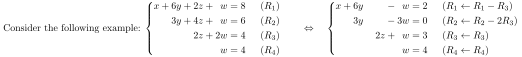

In [26]:
%%itikz --temp-dir --template standalone --tex-packages=systeme
Consider the following example:

\systeme[xyzw]{x + 6 y + 2 z + w = 8 @(R_1), 3 y +4z    + w = 6 @(R_2), 2 z  + 2 w = 4@(R_3), w = 4@(R_4)}

$\qquad \Leftrightarrow\quad$
\systeme[xyzw]{x + 6 y -w = 2@(R_1 \leftarrow R_1 -R_3), 3 y -3 w = 0@(R_2 \leftarrow R_2 -2 R_3), 2 z  + w = 3 @(R_3 \leftarrow R_3), w = 4@(R_4 \leftarrow R_4)}

Rather than immediately proceeding to backsubstitution, we **can use an equation to eliminate the leading variable in the equations above it:**<br>
$\qquad$ e.g., we could use $(R_3)$ to eliminate $z$ from equations $(R_1)$ and $(R_2)$.

The **process in matrix form is the same as before:**
* if the matrix is already in row echelon form, we can use any leading variable.
* we usually proceed from right to left, since we do not need to recompute known zeros
* we could also eliminate both above **and** below at the same time if we start from some given system

<!-- Ab=np.array([[1,6,2,1,8],[0,3,4,1,6],[0,0,2,2,6],[0,0,0,1,4]]); Ab
matrices = [[None, Ab]]; pivots = []; txt=[];  
E1 = np.array( [[1, 0, 0, -1], [0, 1, 0, -1],  [0, 0, 1,-2],  [0, 0, 0, 1]]);A1=E1@Ab;matrices.append([E1,A1]); pivots.append((4,4));txt.append("Pivot at(4,4)")
E2 = np.array( [[1, 0,-1, 0], [0,  1,-2, 0], [0,  0, 1, 0], [0,  0, 0, 1]]);A2=E2@A1;matrices.append([E2,A2]); pivots.append((3,3));txt.append("Pivot at(4,4)")
E3 = np.array( [[1, -2, 0, 0], [0,  1, 0, 0],  [0,  0, 1, 0], [0,  0, 0, 1]]);A3=E3@A2;matrices.append([E3,A3]); pivots.append((2,2));txt.append("Pivot at(2,2)")
pivots.append((1,1)); txt.append("In row echelon form")
mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_int_layout( matrices, Nrhs=1, pivots=pivots, txt=txt)
#We have an incentive to scale the pivots to 1:
-->
<div>
<div style="float:left;padding-right:2cm;"><img src="Figs/gj_example.svg"></div>
<div style="float:left;padding-left:3cm;border-left:2px solid black">
    
For this example, the matrix $A$ **reduced to row echelon form** $\mathbf{I}$!

$\qquad$ Backsubstitution is trivial: the unique solution is
$$\begin{pmatrix}x\\y\\z\\w\end{pmatrix} = \begin{pmatrix}-6\\2\\ -1\\ 4\end{pmatrix}$$
    
---
In general, we can reduce each of the pivot columns to successive columns of $\mathbf{I}$,<br>$\qquad$ but may have non-zero entries; e.g., a matrix like<br>
<img src="Figs/gj_example_1.svg">
    
**Remark:** each of the matrices in the stack to the left is **in row echelon form**<br>
    $\qquad$ a row echelon form of a given matrix **is not unique**
</div></div>

#### **Reduced Row Echelon Form**

* **Good News:**  Backsubstitution is now extremely simple; we did the work by zeroing out above the pivots
* **Bad News:**   **GJ requires twice as much work** compared to GE; we zero out twice as many entries<br>
$\qquad$ the difference in the backsubstitution computations is negligible!

<div style="float:left;background-color:#F2F5A9;width:100%;">

**Definition:** A matrix is in **reduced row echelon form** iff
* the matrix is in row echelon form
* the pivots are scaled to 1
* the entries above the pivots are 0

<br>

**Theorem:** The **reduced row-echelon form** (RREF) of a matrix **is unique.**
</div>

# 4. Take Away

*  The **Gaussian Elimination Algorithm (GE)** and the  **Gauss-Jordan Algorithm (GJ)** reduce a system to a row echelon form
    * Any missing pivots result in free variables:<br>
      $\qquad$ just move on to the next variable (**next column in the matrix**)
    * Redundant equations result in a **row of zeros**<br>
      $\qquad$ just move on to the next variable (**next column in the matrix**)
    * Systems with no solution result in a **row of zeros with a non-zero right hand side**

* **The Number of Solutions** of $A x = b$ is determined by the row echelon form $R x = \tilde{b}$

<img src="Figs/ge_num_solutions.svg" width="500">